In [4]:
# 케라스 함수 호출
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# 필요한 라이브러리 불러오기
import numpy as np
import tensorflow as tf

In [5]:
# 같은 결과를 출력하기 위한 설정
np.random.seed(3)
tf.random.set_seed(3)

In [6]:
# 준비된 수술 환자 데이터를 불러오기
data_set = np.loadtxt('./dataset/ThoraricSurgery.csv', delimiter=",")
data_set

array([[293.  ,   1.  ,   3.8 , ...,   0.  ,  62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88, ...,   0.  ,  60.  ,   0.  ],
       [  8.  ,   2.  ,   3.19, ...,   0.  ,  66.  ,   1.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,  62.  ,   0.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,  58.  ,   1.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,  49.  ,   0.  ]])

In [54]:
# 환자의 기록과 수술결과를 x 와 y 로 구분하여 저장
x = data_set[:, 0:17]
y = data_set[:, -1]
len(x[0])

17

In [49]:
# 딥러닝 구조를 결정
model = Sequential()
model.add(Dense(30, input_dim=17, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [50]:
#딥러닝 실행
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 30)                540       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 31        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [51]:
hist = model.fit(x, y, epochs=100, batch_size=10, validation_split=0.3)

Epoch 1/100
33/33 [==============================] - 1s 10ms/step - loss: 13.6395 - accuracy: 0.2492 - val_loss: 9.0950 - val_accuracy: 0.2199
Epoch 2/100
33/33 [==============================] - 0s 4ms/step - loss: 1.3520 - accuracy: 0.7842 - val_loss: 1.4135 - val_accuracy: 0.7872
Epoch 3/100
33/33 [==============================] - 0s 4ms/step - loss: 1.1428 - accuracy: 0.7994 - val_loss: 2.6001 - val_accuracy: 0.4043
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 1.0333 - accuracy: 0.7690 - val_loss: 1.8313 - val_accuracy: 0.4894
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: 0.9011 - accuracy: 0.7872 - val_loss: 1.2422 - val_accuracy: 0.6383
Epoch 6/100
33/33 [==============================] - 0s 3ms/step - loss: 0.8125 - accuracy: 0.7964 - val_loss: 1.6219 - val_accuracy: 0.4326
Epoch 7/100
33/33 [==============================] - 0s 3ms/step - loss: 0.7185 - accuracy: 0.8085 - val_loss: 1.4497 - val_accuracy: 0.4468
Epoch 8/100

Epoch 59/100
33/33 [==============================] - 0s 3ms/step - loss: 0.3883 - accuracy: 0.8511 - val_loss: 0.5581 - val_accuracy: 0.8085
Epoch 60/100
33/33 [==============================] - 0s 3ms/step - loss: 0.3985 - accuracy: 0.8480 - val_loss: 0.6321 - val_accuracy: 0.7163
Epoch 61/100
33/33 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8450 - val_loss: 0.4327 - val_accuracy: 0.8652
Epoch 62/100
33/33 [==============================] - 0s 3ms/step - loss: 0.4267 - accuracy: 0.8571 - val_loss: 0.4663 - val_accuracy: 0.8227
Epoch 63/100
33/33 [==============================] - 0s 3ms/step - loss: 0.4215 - accuracy: 0.8298 - val_loss: 0.5656 - val_accuracy: 0.8652
Epoch 64/100
33/33 [==============================] - 0s 3ms/step - loss: 0.4321 - accuracy: 0.8511 - val_loss: 0.4545 - val_accuracy: 0.8369
Epoch 65/100
33/33 [==============================] - 0s 3ms/step - loss: 0.4087 - accuracy: 0.8480 - val_loss: 1.1474 - val_accuracy: 0.3121
Epoch 

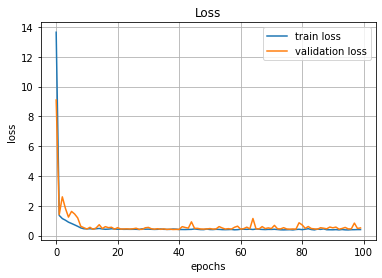

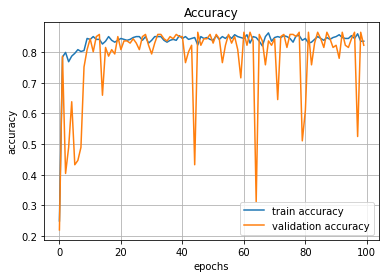

In [52]:
import matplotlib.pyplot as plt
# 손실함수 값
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')

plt.legend(loc="best")

plt.show()

# 정확도
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')

plt.legend(loc="best")

plt.show()